### Code Excercise on Softmaxt Regression

- Following example from [this post](https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16)

In [1]:
# Import libraries. Basic libraries like pandas, numpy have been loaded during initialization
from sklearn import datasets
images, digits = datasets.load_digits(return_X_y=True)

Text(0.5, 1.0, 'Image for 8')

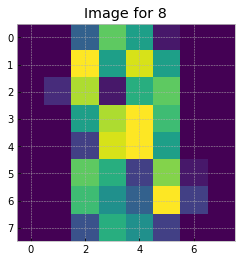

In [2]:
# pick onenumber for example
idx = np.random.randint(0, len(digits))
plt.imshow(images[idx,:].reshape(8, 8))
plt.title(f'Image for {digits[idx]}')

In [3]:
class softmax_regression():
    
    def __init__(self, lr=1e-5, n_iter=1000, lam=10):
        self.lr = lr
        self.n_iter = n_iter
        self.lam = lam
    
    # utitily function that turns a list of labels into one-hot matrix
    def one_hot(self, labels):
        num_labels = labels.shape[0]
        num_classes = len(np.unique(labels))
        index_offset = np.arange(num_labels) * num_classes
        labels_one_hot = np.zeros((num_labels, num_classes))
        labels_one_hot.flat[index_offset + labels.ravel()] = 1
        return labels_one_hot
    
    # softmax function
    def softmax(self, z):
        # subtract max to prevent overflow
        z -= np.max(z)
        #sm = 1 / (1 + np.exp(-z))
        sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
        return sm
    
    # loss function & gradient
    def loss(self, X, y_mat): 
        N, D = X.shape
        Z = X.dot(self.W)
        prob = self.softmax(Z)
        loss = (-1 / N) * np.sum(y_mat * np.log(prob)) + (1 / self.lam) * np.sum(self.W * self.W)
        grad = (-1 / N) * X.T.dot((y_mat - prob)) + (1 / self.lam) * self.W
        return loss, grad
        
    def predict(self, X):
        probs = self.softmax(X.dot(self.W))
        preds = np.argmax(probs, axis = 1)
        return preds
        
    def fit(self, X, y):
        y_mat = self.one_hot(y)
        N, D = X.shape
        self.W = np.zeros((X.shape[1], len(np.unique(y))))
        self.losses = np.zeros(self.n_iter)
        for i in range(self.n_iter):
            loss, grad = self.loss(X, y_mat)
            self.losses[i] = loss
            self.W -= self.lr * grad

In [4]:
## test results

SM = softmax_regression(lr=0.001, n_iter=10000, lam=10)
SM.fit(images, digits)
test_results = SM.predict(images)

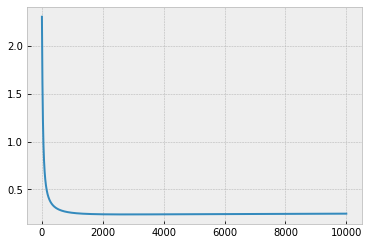

In [5]:
plt.plot(SM.losses)

In [6]:
from sklearn.metrics import classification_report

print(classification_report(digits, test_results))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.96      0.98      0.97       182
           2       1.00      1.00      1.00       177
           3       0.99      0.99      0.99       183
           4       1.00      0.98      0.99       181
           5       0.98      0.99      0.98       182
           6       0.99      0.98      0.99       181
           7       0.99      0.99      0.99       179
           8       0.97      0.96      0.96       174
           9       0.98      0.98      0.98       180

   micro avg       0.99      0.99      0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



In [7]:
## reference using sklearn logistic regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, fit_intercept=False)
LR.fit(images, digits)
sk_results = LR.predict(images)
print(classification_report(digits, sk_results))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       0.97      0.98      0.98       182
           2       1.00      1.00      1.00       177
           3       0.98      1.00      0.99       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       0.98      0.97      0.97       174
           9       1.00      0.98      0.99       180

   micro avg       0.99      0.99      0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



C:\Users\rzhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rzhang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
